In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams["font.size"] = 16

In [3]:
from phd.utils.hepunit import electron_charge, pi, electron_mass_c2, meter, kilovolt



In [4]:
def length_runway(field):
    a = 11    
    return 2*electron_mass_c2*a/(field* abs(electron_charge))

In [17]:
print(length_runway(200*( kilovolt/ meter))/meter)

56.2098966


In [19]:
def dwyer_length_runway(field):
    density_ratio = 1.0/3.0
    return 7300*( kilovolt)/(field - 276*( kilovolt/ meter)*density_ratio)

In [20]:
print(dwyer_length_runway(200*( kilovolt/ meter))/meter)

67.5925925925926


In [5]:
field = np.linspace(100, 300,3, endpoint=True)*( kilovolt/ meter)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


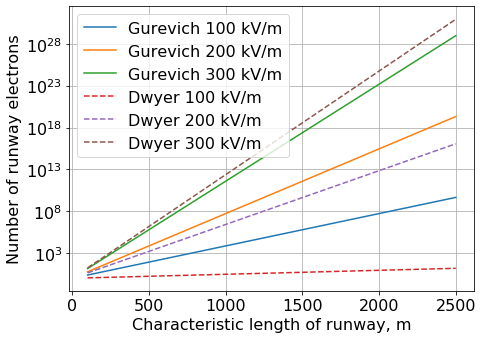

In [27]:
plt.figure(figsize=(7,5))

length_cell = np.arange(100, 2501, 100)
field = np.linspace(100, 300,3, endpoint=True)*( kilovolt/ meter)
for f in field:
    length = length_runway(f)/meter
    plt.plot(length_cell, np.exp(length_cell/length),"-", label="Gurevich {:d} kV/m".format(int(f/(kilovolt/meter))))

for f in field:
    length_d = dwyer_length_runway(f)/meter
    plt.plot(length_cell, np.exp(length_cell/length_d),"--", label = "Dwyer {:d} kV/m".format(int(f/(kilovolt/meter))))



plt.yscale("log")
plt.xlabel("Characteristic length of runway, m")
plt.ylabel("Number of runway electrons")
plt.grid(True)
plt.legend(loc=0)
plt.tight_layout()
plt.savefig("gurevich.eps", format="eps")

In [33]:
field_kvm =  field/( kilovolt/ meter)
length = length_runway(field)/meter
length_cell = np.arange(0, 2001, 100)
X, Y = np.meshgrid(length, length_cell)
Z = np.exp(Y/X)
# plt.plot(x,y , c='k')
# plt.ylabel("Typical length of runway, m")
# plt.xlabel("Electric field, kV/m")
# plt.grid(True)

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

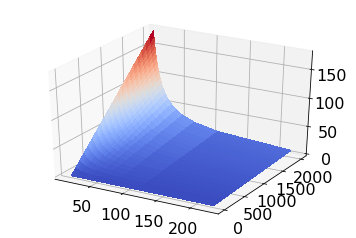

In [35]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, np.log(Z), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [31]:
Z

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.56011812e+00, 2.43396855e+00, 3.79727844e+00, 5.92420291e+00,
        9.24245631e+00, 1.44193236e+01, 2.24958480e+01, 3.50961801e+01,
        5.47541865e+01, 8.54229986e+01, 1.33269968e+02, 2.07916892e+02,
        3.24374911e+02, 5.06063177e+02, 7.89518332e+02, 1.23174186e+03,
        1.92166279e+03, 2.99802094e+03, 4.67726680e+03, 7.29708869e+03],
       [2.43396855e+00, 5.92420291e+00, 1.44193236e+01, 3.50961801e+01,
        8.54229986e+01, 2.07916892e+02, 5.06063177e+02, 1.23174186e+03,
        2.99802094e+03, 7.29708869e+03, 1.77608844e+04, 4.32294340e+04,
        1.05219083e+05, 2.56099939e+05, 6.23339197e+05, 1.5171